# Background

### Z+Jets

In [1]:
import awkward as ak
import pandas as pd
import numpy as np
import vector
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
from funcs import *
hep.style.use("CMS")
#%matplotlib inline
plt.ioff()

lum = 1 # fb-1

In [2]:
csvFiles = "background/ZpJets/ZpJets_"
nFiles = 40
dfs = [pd.read_csv(csvFiles+str(i)+".csv") for i in range(1,nFiles+1)]
data_z = pd.concat(dfs)
data_z.to_csv("background/ZpJets.csv", index=False)

In [3]:
data_z.describe()

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,electron_eta2,electron_eta3,electron_phi0,electron_phi1,electron_phi2,electron_phi3,electron_charge0,electron_charge1,electron_charge2,electron_charge3
count,1.534548e+06,1.445837e+06,1.349897e+06,1.257466e+06,1.534548e+06,1.445837e+06,1.349897e+06,1.257466e+06,1.534548e+06,1.445837e+06,...,338.000000,16.000000,71696.000000,6307.000000,338.000000,16.000000,71696.000000,6307.000000,338.000000,16.00
mean,2.126828e+01,1.175217e+01,8.282211e+00,6.782088e+00,3.435889e-03,7.383853e-03,1.403588e-02,1.202892e-02,2.442851e-04,1.273335e-03,...,0.067900,0.832029,0.003287,-0.010433,-0.019004,0.775473,-0.000251,-0.011574,-0.035503,-0.25
std,2.556106e+01,1.366555e+01,6.824752e+00,4.120406e+00,2.289587e+00,2.514131e+00,2.600688e+00,2.644435e+00,1.812938e+00,1.814035e+00,...,2.788999,2.534346,1.810485,1.812145,1.797497,1.527868,1.000007,1.000012,1.000851,1.00
min,3.000007e+00,3.000003e+00,3.000000e+00,3.000001e+00,-5.597657e+00,-5.603987e+00,-5.602518e+00,-5.597125e+00,-3.141591e+00,-3.141591e+00,...,-4.954478,-3.537830,-3.141441,-3.141018,-3.118356,-2.874632,-1.000000,-1.000000,-1.000000,-1.00
25%,8.239494e+00,5.836231e+00,4.937371e+00,4.471707e+00,-1.681077e+00,-1.904255e+00,-2.003561e+00,-2.058858e+00,-1.570017e+00,-1.571104e+00,...,-2.094381,-0.479944,-1.565990,-1.547393,-1.471799,0.242688,-1.000000,-1.000000,-1.000000,-1.00
50%,1.321885e+01,8.383276e+00,6.754522e+00,5.913620e+00,-6.766700e-04,-3.135713e-03,2.573757e-05,-5.953752e-03,5.246591e-04,2.911670e-03,...,-0.085357,0.853595,-0.001186,-0.036394,-0.071120,0.995671,-1.000000,-1.000000,-1.000000,-1.00
75%,2.413846e+01,1.252299e+01,9.322746e+00,7.846265e+00,1.673652e+00,1.892918e+00,1.999049e+00,2.051403e+00,1.571764e+00,1.571436e+00,...,2.419704,2.952121,1.564538,1.535413,1.578065,1.643057,1.000000,1.000000,1.000000,1.00
max,1.253642e+03,8.988361e+02,4.782599e+02,2.412252e+02,5.996959e+00,6.003622e+00,5.999133e+00,5.999251e+00,3.141592e+00,3.141586e+00,...,5.161246,4.659732,3.141570,3.141402,3.129135,3.134139,1.000000,1.000000,1.000000,1.00


In [4]:
csvFiles = "background/WpJets/WpJets_"
nFiles = 40
dfs = [pd.read_csv(csvFiles+str(i)+".csv") for i in range(1,nFiles+1)]
data_w = pd.concat(dfs)
data_w.to_csv("background/WpJets.csv", index=False)

In [5]:
data_w.describe()

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,electron_eta2,electron_eta3,electron_phi0,electron_phi1,electron_phi2,electron_phi3,electron_charge0,electron_charge1,electron_charge2,electron_charge3
count,1.585119e+06,1.490761e+06,1.389858e+06,1.293027e+06,1.585119e+06,1.490761e+06,1.389858e+06,1.293027e+06,1.585119e+06,1.490761e+06,...,2703.000000,139.000000,570092.000000,33259.000000,2703.000000,139.000000,570092.000000,33259.000000,2703.000000,139.000000
mean,2.168762e+01,1.187314e+01,8.329601e+00,6.805708e+00,1.252538e-03,4.569354e-03,1.293278e-02,1.587226e-02,9.393947e-04,-1.408609e-03,...,0.120165,0.279091,0.005437,-0.011817,-0.089388,-0.199456,0.153761,-0.001473,-0.029227,0.107914
std,2.406663e+01,1.344401e+01,6.804808e+00,4.179912e+00,2.316539e+00,2.514172e+00,2.605256e+00,2.651941e+00,1.813398e+00,1.813292e+00,...,2.766022,2.620385,1.814127,1.809721,1.812025,1.803582,0.988109,1.000014,0.999758,0.997756
min,3.000028e+00,3.000013e+00,3.000003e+00,3.000001e+00,-5.602970e+00,-5.599250e+00,-5.602629e+00,-5.604396e+00,-3.141592e+00,-3.141589e+00,...,-4.995465,-4.915782,-3.141586,-3.140944,-3.137936,-3.135631,-1.000000,-1.000000,-1.000000,-1.000000
25%,8.387650e+00,5.852433e+00,4.935389e+00,4.464276e+00,-1.718620e+00,-1.906948e+00,-2.006025e+00,-2.065378e+00,-1.568466e+00,-1.571839e+00,...,-2.162149,-1.379498,-1.566273,-1.577579,-1.691560,-1.865929,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.392308e+01,8.470441e+00,6.777008e+00,5.917517e+00,-7.435934e-04,-7.501555e-03,-4.706919e-03,-4.543506e-04,3.130436e-03,-1.106076e-03,...,0.033819,0.643772,0.009633,-0.022594,-0.172350,-0.407505,1.000000,-1.000000,-1.000000,1.000000
75%,2.685941e+01,1.281359e+01,9.398063e+00,7.879682e+00,1.707407e+00,1.886725e+00,2.002337e+00,2.063173e+00,1.571422e+00,1.566308e+00,...,2.454956,2.170887,1.576987,1.551000,1.461386,1.335590,1.000000,1.000000,1.000000,1.000000
max,9.110306e+02,7.036896e+02,3.798388e+02,2.446980e+02,5.998601e+00,5.999008e+00,5.999980e+00,6.001646e+00,3.141587e+00,3.141590e+00,...,5.195249,4.744041,3.141588,3.141007,3.140778,3.092609,1.000000,1.000000,1.000000,1.000000


Cross Sections

In [6]:
nMetaRuns = 4

CSs = {"run": [],
       "ZpJets": [],
       "errorZpJets": [],
       "NeventsZpJets": [],
       "WpJets": [],
       "errorWpJets": [],
       "NeventsWpJets": []}

run = 1

for i in range(nMetaRuns):
       outFile = f"background/outputs/output{i}.out"
       outData = open(outFile, "r")
       outText = outData.read()
       outData.close()

       counter = 1
       indexWpJ = int(outText.find('WpJets'))
       indexZpJ = int(outText.find('ZpJets'))
       if indexZpJ < indexWpJ:
              BGtype1 = 'Z'
              BGtype2 = 'W'
       else:
              BGtype1 = 'W'
              BGtype2 = 'Z'
       indexCS = outText.find('Matched cross-section :   ')
       indexPM = outText.find(' +- ', indexCS)
       indexPB = outText.find(' pb', indexCS)
       indexNe = outText.find('Nb of events after merging :  ', indexCS)
       while indexCS != -1:
              if counter <= 10:
                     CSs[f"{BGtype1}pJets"].append(float(outText[indexCS+26:indexPM]))
                     CSs[f"error{BGtype1}pJets"].append(float(outText[indexPM+4:indexPB]))
                     CSs[f"Nevents{BGtype1}pJets"].append(int(outText[indexNe+30:indexNe+36]))
                     CSs["run"].append(run)
                     run += 1
              else:
                     CSs[f"{BGtype2}pJets"].append(float(outText[indexCS+26:indexPM]))
                     CSs[f"error{BGtype2}pJets"].append(float(outText[indexPM+4:indexPB]))
                     CSs[f"Nevents{BGtype2}pJets"].append(int(outText[indexNe+30:indexNe+36]))
              indexCS = outText.find('Matched cross-section :', indexCS+1)
              indexPM = outText.find(' +- ', indexCS)
              indexPB = outText.find(' pb', indexCS)
              indexNe = outText.find('Nb of events after merging :  ', indexCS)
              counter +=1

In [7]:
crossSec = pd.DataFrame(CSs) # pb
crossSec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   run            40 non-null     int64  
 1   ZpJets         40 non-null     float64
 2   errorZpJets    40 non-null     float64
 3   NeventsZpJets  40 non-null     int64  
 4   WpJets         40 non-null     float64
 5   errorWpJets    40 non-null     float64
 6   NeventsWpJets  40 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 2.3 KB


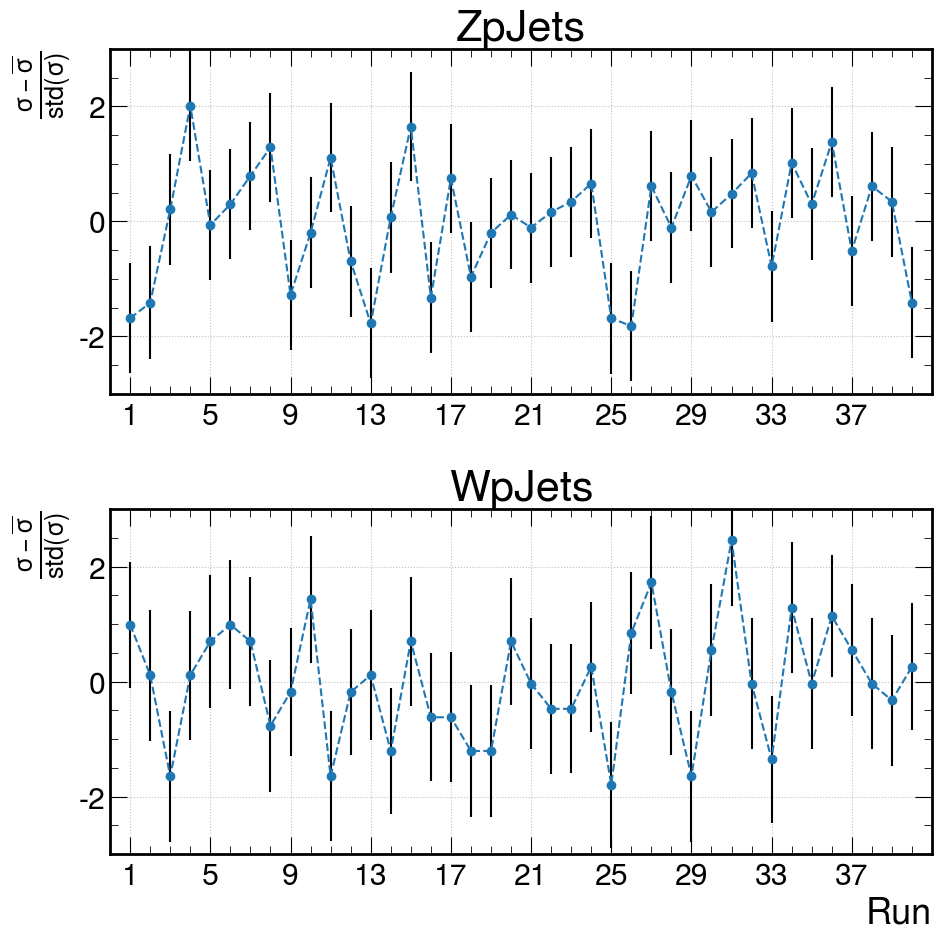

In [8]:
fig, ax = plt.subplots(2,1)
ax[0].errorbar(crossSec["run"], (crossSec["ZpJets"]-crossSec["ZpJets"].mean())/crossSec["ZpJets"].std(), yerr=crossSec["errorZpJets"]/crossSec["ZpJets"].std(), marker='o', linestyle='--', ecolor="black")
ax[1].errorbar(crossSec["run"], (crossSec["WpJets"]-crossSec["WpJets"].mean())/crossSec["WpJets"].std(), yerr=crossSec["errorWpJets"]/crossSec["WpJets"].std(), marker='o', linestyle='--', ecolor="black")
ax[0].set_title("ZpJets")
ax[1].set_title("WpJets")
ax[1].set_xlabel("Run")
ax[0].set_ylabel(r"$\frac{\sigma - \overline{\sigma}}{\mathrm{std}(\sigma)}$")
ax[1].set_ylabel(r"$\frac{\sigma - \overline{\sigma}}{\mathrm{std}(\sigma)}$")
ax[0].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
ax[1].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
ax[0].set_ylim(-3,3)
ax[1].set_ylim(-3,3)
ax[0].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[1].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[0].grid()
ax[1].grid()
plt.tight_layout()
plt.show()

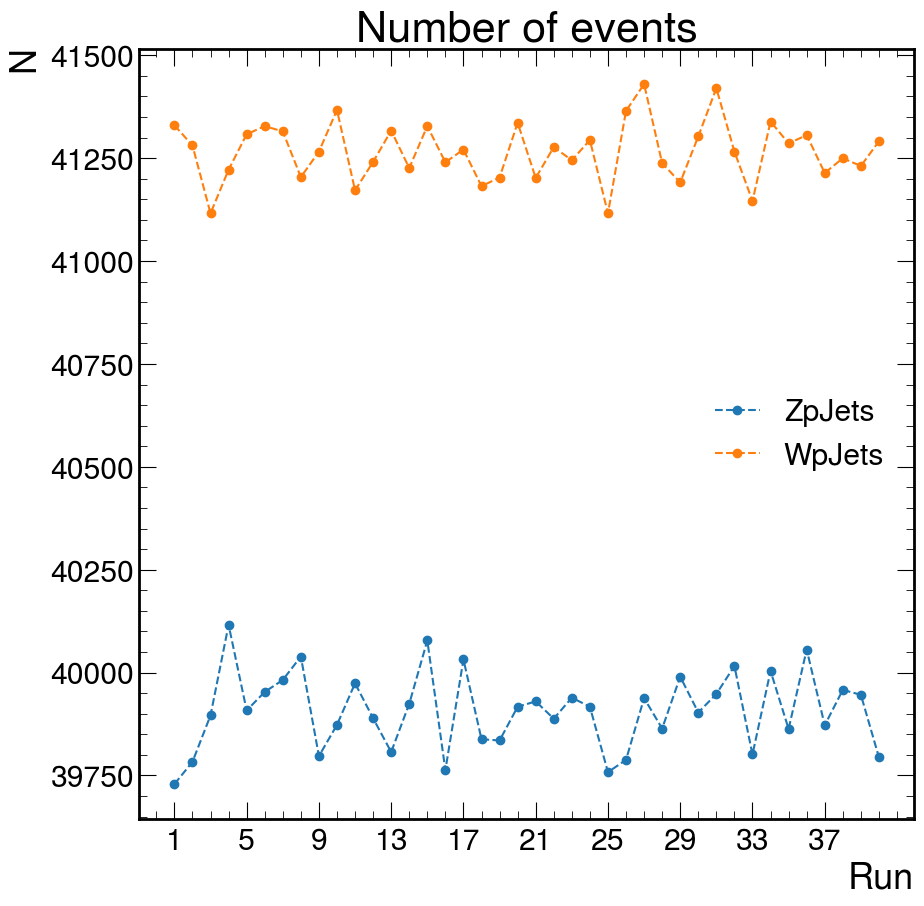

In [9]:
plt.plot(crossSec["run"],crossSec["NeventsZpJets"], marker='o', linestyle='--', label='ZpJets')
plt.plot(crossSec["run"],crossSec["NeventsWpJets"], marker='o', linestyle='--', label='WpJets')
plt.title("Number of events")
plt.xlabel("Run")
plt.ylabel(r"$N$")
plt.xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
plt.legend()
plt.show()

In [10]:
(crossSec["NeventsZpJets"]*crossSec["errorZpJets"]/(crossSec["ZpJets"]*1000)**2)

0     1.080833e-08
1     1.106774e-08
2     1.085252e-08
3     1.064834e-08
4     1.068803e-08
5     1.076691e-08
6     1.057620e-08
7     1.066108e-08
8     1.073363e-08
9     1.085815e-08
10    1.060288e-08
11    1.091491e-08
12    1.082935e-08
13    1.081175e-08
14    1.068764e-08
15    1.082343e-08
16    1.071838e-08
17    1.081918e-08
18    1.076175e-08
19    1.069094e-08
20    1.076227e-08
21    1.081231e-08
22    1.076578e-08
23    1.069745e-08
24    1.085694e-08
25    1.086741e-08
26    1.068527e-08
27    1.088119e-08
28    1.080080e-08
29    1.078095e-08
30    1.064457e-08
31    1.073457e-08
32    1.080951e-08
33    1.069139e-08
34    1.090941e-08
35    1.077697e-08
36    1.070757e-08
37    1.065522e-08
38    1.071704e-08
39    1.087747e-08
dtype: float64

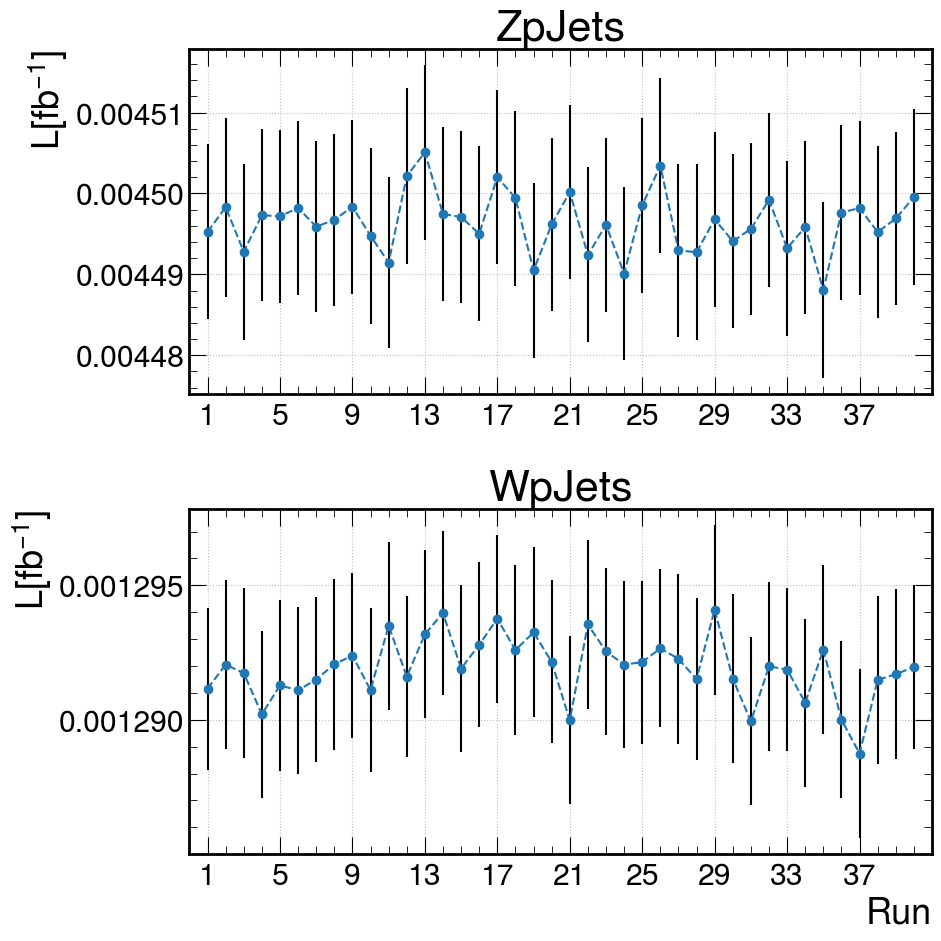

In [11]:
fig, ax = plt.subplots(2,1)
ax[0].errorbar(crossSec["run"], crossSec["NeventsZpJets"]*(1/1000)/(crossSec["ZpJets"]), yerr=(crossSec["NeventsZpJets"]*crossSec["errorZpJets"]*(1/1000)/(crossSec["ZpJets"])**2), marker='o', linestyle='--', ecolor="black")
ax[1].errorbar(crossSec["run"], crossSec["NeventsWpJets"]*(1/1000)/(crossSec["WpJets"]), yerr=(crossSec["NeventsWpJets"]*crossSec["errorWpJets"]*(1/1000)/(crossSec["WpJets"])**2), marker='o', linestyle='--', ecolor="black")
ax[0].set_title("ZpJets")
ax[1].set_title("WpJets")
ax[1].set_xlabel("Run")
ax[0].set_ylabel(r"$\mathcal{L} [$fb$^{-1}]$")
ax[1].set_ylabel(r"$\mathcal{L} [$fb$^{-1}]$")
ax[0].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
ax[1].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
#ax[0].set_ylim(-3,3)
#ax[1].set_ylim(-3,3)
ax[0].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[1].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[0].grid()
ax[1].grid()
plt.tight_layout()
plt.show()

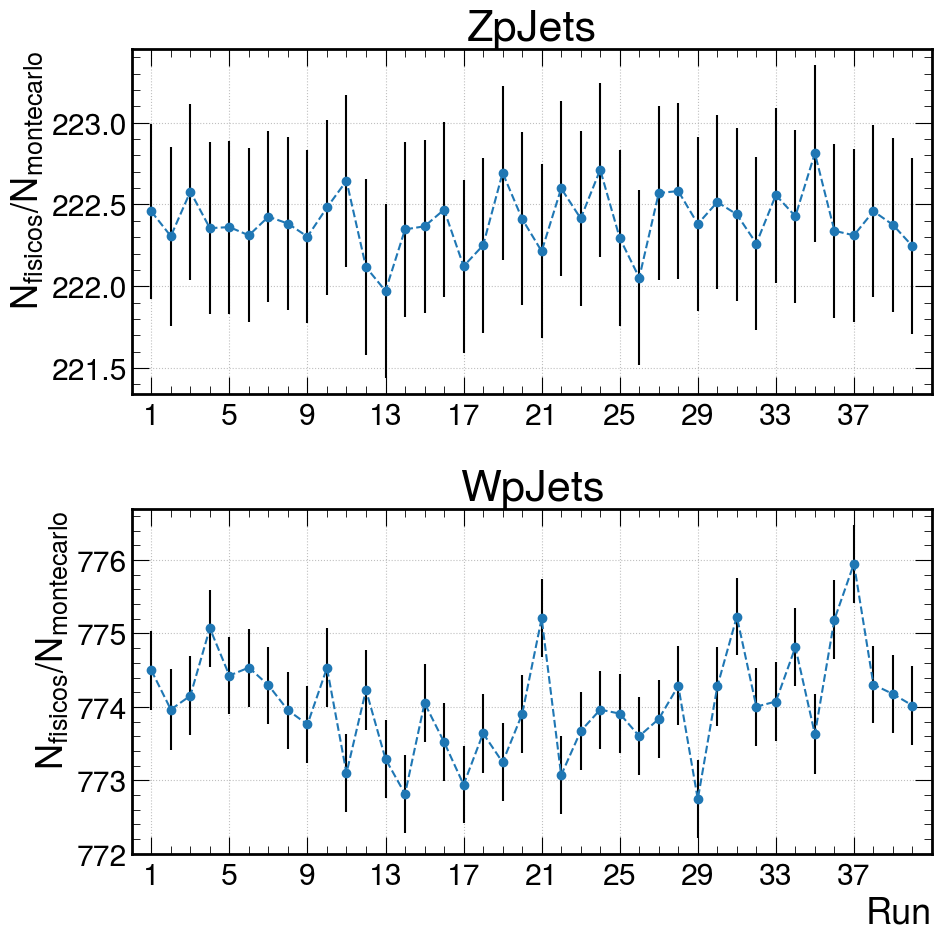

In [12]:
fig, ax = plt.subplots(2,1)
ax[0].errorbar(crossSec["run"], (crossSec["ZpJets"]*1000*lum)/crossSec["NeventsZpJets"], yerr=(crossSec["errorZpJets"]*1000*lum)/crossSec["NeventsZpJets"], marker='o', linestyle='--', ecolor="black")
ax[1].errorbar(crossSec["run"], (crossSec["WpJets"]*1000*lum)/crossSec["NeventsWpJets"], yerr=(crossSec["errorZpJets"]*1000*lum)/crossSec["NeventsZpJets"], marker='o', linestyle='--', ecolor="black")
ax[0].set_title("ZpJets")
ax[1].set_title("WpJets")
ax[1].set_xlabel("Run")
ax[0].set_ylabel(r"$N_{fisicos}/N_{montecarlo}$")
ax[1].set_ylabel(r"$N_{fisicos}/N_{montecarlo}$")
ax[0].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
ax[1].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
#ax[0].set_ylim(-3,3)
#ax[1].set_ylim(-3,3)
ax[0].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[1].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[0].grid()
ax[1].grid()
plt.tight_layout()
plt.show()

Valores promedio

In [13]:
labels = ['WpJets', 'ZpJets']
CSmean = [crossSec[i].mean() for i in labels]
dCSmean = [crossSec[f'error{i}'].mean() for i in labels]
totEvents = [crossSec[f'Nevents{i}'].sum() for i in labels]
totLuminosity = [totEvents[i]/CSmean[i] for i in range(2)]
dtotLuminosity = [dCSmean[i]*totLuminosity[i]/CSmean[i] for i in range(2)]
weight = [CSmean[i]*1000*lum/totEvents[i] for i in range(2)]
dweight = [dCSmean[i]*1000*lum/totEvents[i] for i in range(2)]
phyEvents = [weight[i]*totEvents[i] for i in range(2)]

print("Cross-section:")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{CSmean[i]} +- {round(dCSmean[i],2)} pb")

print("Total Events:")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{totEvents[i]}")

print("MG+Pythia Luminosity:")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{round(totLuminosity[i],2)} +- {round(dtotLuminosity[i],2)} pb^(-1)")

print(f"Weights with L={lum} fb^(-1)")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{round(weight[i],2)} +- {round(dweight[i],2)}")

print("Total Physical Events:")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{phyEvents[i]}")

Cross-section:
	WpJets:  31942.25 +- 76.58 pb
	ZpJets:  8875.375 +- 21.26 pb
Total Events:
	WpJets:  1650663
	ZpJets:  1596306
MG+Pythia Luminosity:
	WpJets:  51.68 +- 0.12 pb^(-1)
	ZpJets:  179.86 +- 0.43 pb^(-1)
Weights with L=1 fb^(-1)
	WpJets:  19.35 +- 0.05
	ZpJets:  5.56 +- 0.01
Total Physical Events:
	WpJets:  31942250.0
	ZpJets:  8875375.0


In [14]:
Weight = {'WpJets': [weight[0]], 'ZpJets': [weight[1]]}
dfWeight = pd.DataFrame(Weight)
dfWeight.to_csv("BGweigths.csv")

In [15]:
data_w.columns

Index(['jet_pt0', 'jet_pt1', 'jet_pt2', 'jet_pt3', 'jet_eta0', 'jet_eta1',
       'jet_eta2', 'jet_eta3', 'jet_phi0', 'jet_phi1', 'jet_phi2', 'jet_phi3',
       'jet_mass0', 'jet_mass1', 'jet_mass2', 'jet_mass3', 'jet_btag0',
       'jet_btag1', 'jet_btag2', 'jet_btag3', 'jet_tautag0', 'jet_tautag1',
       'jet_tautag2', 'jet_tautag3', 'missinget_met', 'missinget_phi',
       'muon_pt0', 'muon_pt1', 'muon_pt2', 'muon_pt3', 'muon_eta0',
       'muon_eta1', 'muon_eta2', 'muon_eta3', 'muon_phi0', 'muon_phi1',
       'muon_phi2', 'muon_phi3', 'muon_charge0', 'muon_charge1',
       'muon_charge2', 'muon_charge3', 'electron_pt0', 'electron_pt1',
       'electron_pt2', 'electron_pt3', 'electron_eta0', 'electron_eta1',
       'electron_eta2', 'electron_eta3', 'electron_phi0', 'electron_phi1',
       'electron_phi2', 'electron_phi3', 'electron_charge0',
       'electron_charge1', 'electron_charge2', 'electron_charge3'],
      dtype='object')

In [16]:
data_w[data_w['jet_pt0'].isnull()][data_w.columns[24:]]

,missinget_met,missinget_phi,muon_pt0,muon_pt1,muon_pt2,muon_pt3,muon_eta0,muon_eta1,muon_eta2,muon_eta3,...,electron_eta2,electron_eta3,electron_phi0,electron_phi1,electron_phi2,electron_phi3,electron_charge0,electron_charge1,electron_charge2,electron_charge3
54,1.356266,0.551965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,39.614204,0.330192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,28.292337,0.759576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,24.592506,1.728949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,43.577232,1.351555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41131,27.677334,0.841038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-2.418305,NaN,NaN,NaN,1.0,NaN,NaN,NaN
41144,29.036710,-3.131842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.062575,NaN,NaN,NaN,-1.0,NaN,NaN,NaN
41164,36.258232,2.033525,35.462660,NaN,NaN,NaN,3.276875,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41165,41.641020,0.764615,39.303204,NaN,NaN,NaN,2.493560,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


: 